In [98]:
!pip install yfinance

In [99]:
 !pip install nbformat  



In [100]:
import pandas as pd
import yfinance as yf
import datetime
import numpy as np
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Analyzing Historical Stock/Revenue Data and Building a Dashboard

We will analyze stock data of 2 companies and their visualization based on the selected period:

* Tesla
* GameStop

### Question 1:  Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. 

In [101]:
tesla = yf.Ticker('TSLA')

In [102]:
tesla_data = tesla.history(period="max")

In [103]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [104]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [105]:
html_data = requests.get(url).text

In [106]:
soup = BeautifulSoup(html_data, "html.parser")
soup.find_all('title')

[<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>]

In [107]:
tesla_revenue=pd.DataFrame(columns=["Date","Revenue"])
for row in soup.find('tbody').find_all('tr'):
            col=row.find_all('td')
            date=col[0].text
            revenue=col[1].text
            tesla_revenue=tesla_revenue._append({"Date":date,"Revenue":revenue},ignore_index=True)
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)

tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "")

In [108]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


### Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. 

In [109]:
gme = yf.Ticker('GME')

In [110]:
gme_data = gme.history(period="max")

In [111]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


### Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.



In [112]:
url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [113]:
html_data1 = requests.get(url1).text

In [114]:
soup = BeautifulSoup(html_data1, "html.parser")
soup.find_all('title')

[<title>GameStop Revenue 2006-2020 | GME | MacroTrends</title>]

In [115]:
gme_revenue=pd.DataFrame(columns=["Date","Revenue"])
for row in soup.find('tbody').find_all('tr'):
            col=row.find_all('td')
            date=col[0].text
            revenue=col[1].text
            gme_revenue=gme_revenue._append({"Date":date,"Revenue":revenue},ignore_index=True)
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
gme_revenue.dropna(inplace=True)



In [116]:
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


### Question 5:  Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

In [120]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=True,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

/tmp/ipykernel_7263/2534642522.py:3: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/home/samara/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/tmp/ipykernel_7263/2534642522.py:4: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/home/samara/anaconda3/lib/python3.11/site-packages/_plotly_util

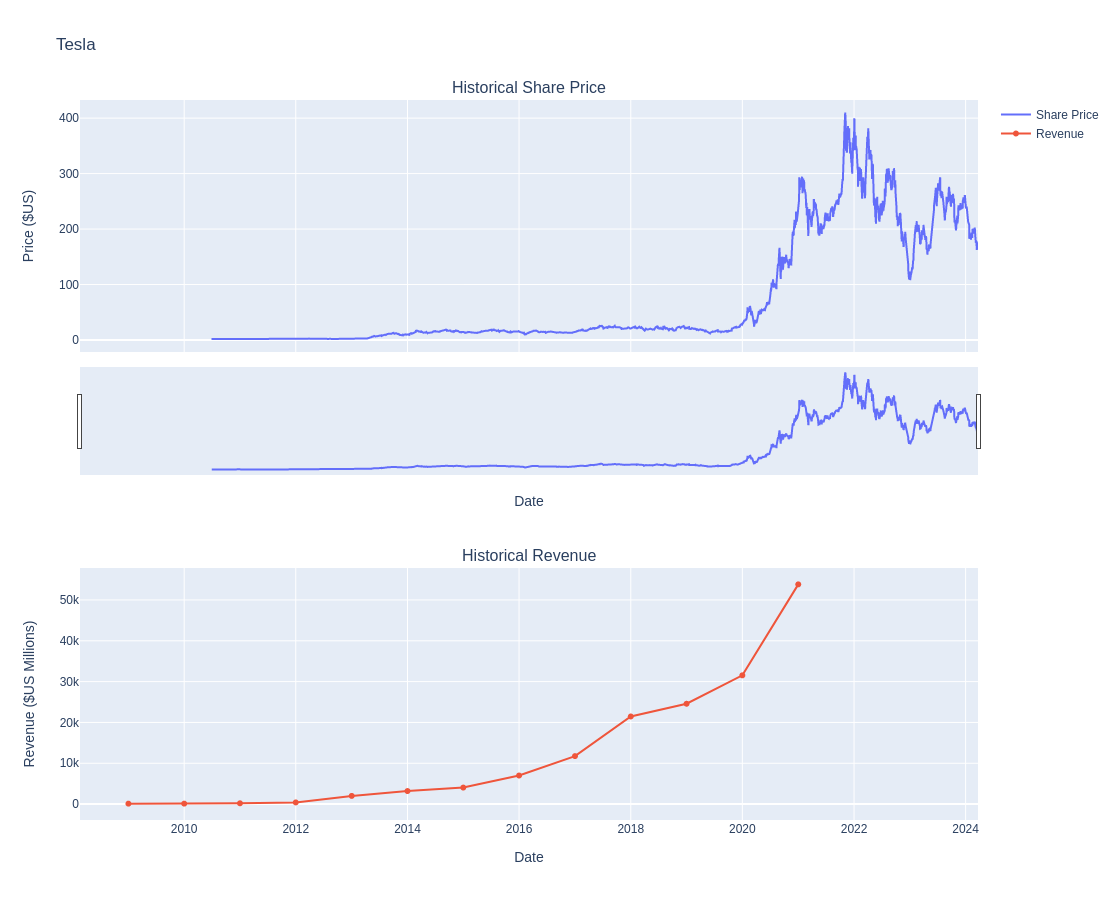

In [121]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

### Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

/tmp/ipykernel_7263/2534642522.py:3: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/home/samara/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/tmp/ipykernel_7263/2534642522.py:4: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/home/samara/anaconda3/lib/python3.11/site-packages/_plotly_util

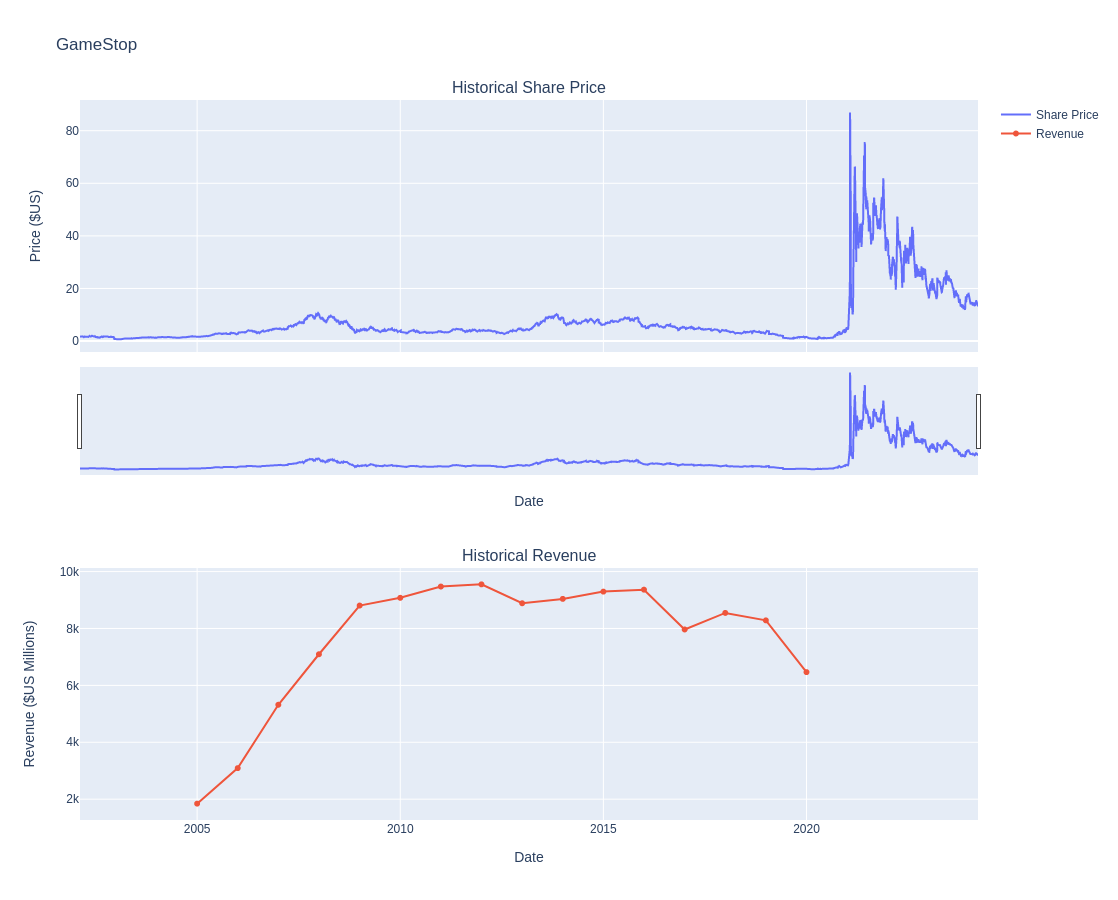

In [124]:
make_graph(gme_data, gme_revenue, 'GameStop')